#**CLASSIFICAZIONE OGGETTI E PERSONE**

In questo script viene usata una rete **YOLO** , con lo scopo di classificare le immagini del dataset-civiltà-contadina. Questa rete è la migliore nella classificazione secondo lo stato dell'arte. Cercando di restituire la classe di appartenenza del oggetto o persona che abbiamo nell'immagine.  La predizione è di alta qualità pero mancano alcuni accorgimenti:
- epoche = 1 , troppo poche , pero richiede molto tempo se aumentiamo la cardinalità
- data argomentation
- pre-addestramento
- nessuna ottimizazzione nella scelta del numero delle epoche
- nessun cross-validatione dei dati di input

Problemi classificazione:
- Bisogna aumentare il dati di addestramento
- Bilanciare il dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive//MyDrive/

 Audio		     CNN-CLASSIFICAZIONE	 DOCUMENTI_POP_OS  'RIVISTA HACKING'
 BIG_DATA_PROGETTO  'Colab Notebooks'		 GIAPPONE	    tuo_dataset
 Capo		     ComputerVision		'Manutenzione '
 CAPODANNO2024	     dataset-civiltà-contadina	 NATALE2023


In [3]:
!ls /content/drive//MyDrive/dataset-civiltà-contadina

CivContadina_serie1  CivContadina_serie2  CivContadina_serie3  COCODatasetPerson  object  person


In [5]:
#SYSTEM
import os

#IMAGES
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image

#MODEL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Reshape, Permute


In [6]:
#NEW LIBRARY
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.2/825.2 kB 16.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [9]:
from ultralytics import YOLO
model = YOLO('yolov8n-cls.pt')

In [16]:
# Train the model
results = model.train(data="imagenette", epochs=1, imgsz=224)

Ultralytics YOLOv8.2.62 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=imagenette, epochs=1, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

train: Scanning /content/datasets/imagenette/train... 9469 images, 0 corrupt: 100%|██████████| 9469/9469 [00:00<?, ?it/s]
val: Scanning /content/datasets/imagenette/val... 3925 images, 0 corrupt: 100%|██████████| 3925/3925 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train2
Starting training for 1 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 123/123 [01:32<00:00,  1.33it/s]


                   all      0.954      0.997

1 epochs completed in 0.181 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.0MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.2.62 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
train: /content/datasets/imagenette/train... found 9469 images in 10 classes ✅ 
val: /content/datasets/imagenette/val... found 3925 images in 10 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 123/123 [01:25<00:00,  1.44it/s]


                   all      0.954      0.997
Speed: 0.0ms preprocess, 11.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2


In [29]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

# Percorso della directory delle immagini
test_images_dir = '/content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2'

# Funzione per caricare e pre-processare un'immagine
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)  # Carica l'immagine e ridimensionala
    img_array = image.img_to_array(img)  # Converti l'immagine in un array
    img_array = img_array.astype('float32')  # Assicurati che l'array sia di tipo float32
    img_array = np.expand_dims(img_array, axis=0)  # Aggiungi una dimensione in più per il batch
    return preprocess_input(img_array)

# Funzione per classificare l'immagine
def classify_image(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    preds = model.predict(img_array)
    decoded_preds = decode_predictions(preds, top=3)[0]
    return decoded_preds

# Funzione per visualizzare i risultati della classificazione
def display_result(image_path, result):
    print(f'Predictions for {image_path}:')
    for pred in result:
        print(f'{pred[1]}: {pred[2] * 100:.2f}%')

# Carica le immagini dalla directory
def load_images_from_directory(directory_path):
    image_paths = []
    for root, _, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.JPG' '.jpeg', '.png')):
                image_paths.append(os.path.join(root, file))
    return image_paths

# Caricamento del modello pre-addestrato (ResNet50 in questo caso)
model = ResNet50(weights='imagenet')

# Carica le Immagini, Classifica e Visualizza i risultati
image_paths = load_images_from_directory(test_images_dir)

for img_path in image_paths:
    result = classify_image(img_path, model)
    display_result(img_path, result)


35363/35363 [==============================] - 0s 0us/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/194.JPG:
drum: 65.42%
milk_can: 9.88%
bucket: 5.72%
1/1 [==============================] - 0s 182ms/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/147.JPG:
castle: 46.28%
church: 10.96%
viaduct: 5.92%
1/1 [==============================] - 0s 173ms/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/_Anteprima.jpg:
matchstick: 90.06%
picket_fence: 7.04%
web_site: 0.93%
1/1 [==============================] - 0s 180ms/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/155.JPG:
thatch: 97.39%
hay: 0.79%
fox_squirrel: 0.14%
1/1 [==============================] - 0s 169ms/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/197.JPG:
potter's_wheel: 26.92%
bucket: 17.88%
stove: 11.49%
1/1 [=

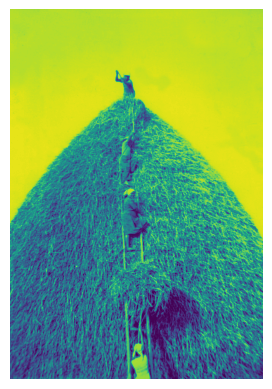

In [33]:
# Percorso dell'immagine ------> thatch 96%
img_path = '/content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/155.JPG'

# Caricare e visualizzare l'immagine
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Nascondere gli assi
plt.show()

In [34]:
# Funzione per visualizzare i risultati della classificazione e determinare se è una persona o un oggetto
def display_result_obj_peaple(image_path, result):
    print(f'Predictions for {image_path}:')
    is_person = False
    for pred in result:
        print(f'{pred[1]}: {pred[2] * 100:.2f}%')
        if 'person' in pred[1]:  # Controlla se la previsione contiene 'person'
            is_person = True
    if is_person:
        print("The image contains a person.")
    else:
        print("The image contains an object.")

In [36]:
# Carica le Immagini, Classifica e Visualizza i risultati
image_paths = load_images_from_directory(test_images_dir)

for img_path in image_paths:
    result = classify_image(img_path, model)
    display_result_obj_peaple(img_path, result)

1/1 [==============================] - 0s 170ms/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/194.JPG:
drum: 65.42%
milk_can: 9.88%
bucket: 5.72%
The image contains an object.
1/1 [==============================] - 0s 174ms/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/147.JPG:
castle: 46.28%
church: 10.96%
viaduct: 5.92%
The image contains an object.
1/1 [==============================] - 0s 173ms/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/_Anteprima.jpg:
matchstick: 90.06%
picket_fence: 7.04%
web_site: 0.93%
The image contains an object.
1/1 [==============================] - 0s 171ms/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/155.JPG:
thatch: 97.39%
hay: 0.79%
fox_squirrel: 0.14%
The image contains an object.
1/1 [==============================] - 0s 178ms/step
Predictions for /content/drive/MyDrive/

In [37]:
# Funzione per visualizzare i risultati della classificazione e determinare se è una persona o un oggetto
def display_result_new(image_path, result):
    print(f'Predictions for {image_path}:')
    # Parole chiave rappresentative di categorie di persone in ImageNet
    person_keywords = [
        'person', 'man', 'woman', 'child', 'boy', 'girl', 'adult', 'infant',
        'bridegroom', 'bride', 'groom', 'obstetrician', 'military uniform', 'police', 'doctor', 'nurse', 'student', 'teacher'
    ]
    is_person = False
    for pred in result:
        print(f'{pred[1]}: {pred[2] * 100:.2f}%')
        # Controlla se la previsione contiene una delle parole chiave
        if any(keyword in pred[1] for keyword in person_keywords):
            is_person = True
    if is_person:
        print("The image contains a person.")
    else:
        print("The image contains an object.")

In [38]:
# Carica le Immagini, Classifica e Visualizza i risultati
image_paths = load_images_from_directory(test_images_dir)

for img_path in image_paths:
    result = classify_image(img_path, model)
    display_result_new(img_path, result)

1/1 [==============================] - 0s 184ms/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/194.JPG:
drum: 65.42%
milk_can: 9.88%
bucket: 5.72%
The image contains an object.
1/1 [==============================] - 0s 187ms/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/147.JPG:
castle: 46.28%
church: 10.96%
viaduct: 5.92%
The image contains an object.
1/1 [==============================] - 0s 184ms/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/_Anteprima.jpg:
matchstick: 90.06%
picket_fence: 7.04%
web_site: 0.93%
The image contains an object.
1/1 [==============================] - 0s 183ms/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/155.JPG:
thatch: 97.39%
hay: 0.79%
fox_squirrel: 0.14%
The image contains an object.
1/1 [==============================] - 0s 170ms/step
Predictions for /content/drive/MyDrive/